In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = layers.Input( ( 32, 32, 3 ) )

output = layers.Conv2D( filters = 16, kernel_size = [ 3, 3 ],
                       activation = 'relu')(inputs)
output = layers.Conv2D( filters = 32, kernel_size = [ 3, 3 ],
                      padding = 'same', activation = 'relu' )( output )
output = layers.BatchNormalization()(output)
output = layers.MaxPooling2D( pool_size = [ 2, 2 ] )(output)
output = layers.Dropout(0.2)(output)
output = layers.Flatten()(output)
output = layers.Dense( 128, activation = 'relu' )(output)
output = layers.Dropout(0.5)(output)
output = layers.Dense( 10, activation = 'softmax' )(output)

In [3]:
model = keras.Model( inputs = inputs, outputs = output, name = 'basic')
model.summary()

Model: "basic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0     

In [4]:
lr = 1e-3
BATCH_SIZE = 128
EPOCHS = 50

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical( y_train, 10 )
y_test = keras.utils.to_categorical( y_test, 10 )

170500096/170498071 [==============================] - 6s 0us/step


In [6]:
model.compile( optimizer = keras.optimizers.Adadelta(lr),
              loss = keras.losses.CategoricalCrossentropy(), metrics = ['acc'])

In [7]:
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE,
                    epochs = EPOCHS, validation_split = 0.2 )

Epoch 1/50
313/313 [==============================] - 5s 15ms/step - loss: 3.1001 - acc: 0.1162 - val_loss: 2.3100 - val_acc: 0.1489
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 2.7925 - acc: 0.1317 - val_loss: 2.2972 - val_acc: 0.1873
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 2.6284 - acc: 0.1471 - val_loss: 2.2414 - val_acc: 0.2117
Epoch 4/50
313/313 [==============================] - 4s 13ms/step - loss: 2.5163 - acc: 0.1630 - val_loss: 2.1883 - val_acc: 0.2337
Epoch 5/50
313/313 [==============================] - 4s 13ms/step - loss: 2.4391 - acc: 0.1732 - val_loss: 2.1484 - val_acc: 0.2470
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 2.3802 - acc: 0.1836 - val_loss: 2.1167 - val_acc: 0.2587
Epoch 7/50
313/313 [==============================] - 4s 13ms/step - loss: 2.3297 - acc: 0.1944 - val_loss: 2.0903 - val_acc: 0.2716
Epoch 8/50
313/313 [==============================] - 4s 13ms/step - 

In [9]:
evaluation = model.evaluate( x_test, y_test )
print( 'loss: {:.9f}, Accuracy: {:.2f}%'.format( evaluation[0], evaluation[1] * 100 ) )

313/313 [==============================] - 1s 4ms/step - loss: 1.6928 - acc: 0.4203
loss: 1.692755461, Accuracy: 42.03%


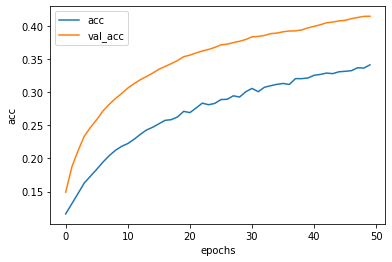

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'])
plt.xlabel( 'epochs' )
plt.ylabel( 'acc' )
plt.legend( ['acc', 'val_acc'] )

plt.savefig('basicCNN.png')
plt.show()